# Assignment-2
- **Problem-1**
- **ID=160204008**


### **Problem #1**

*   Apply **Neural Network / Deep Neural Network** for the **NumtaDB** dataset and build a multiclass classification model that can recognize `[0-9]` Bengali handwritten digits with different hyperparameter settings.  


### *** Approach ***
- Our input size is determined by the size of the image **(height x width) = (28X28)**. Hence the size of our input is **784 (28 x 28)**.

 - When we pass an image to our model, it will try to predict if it's **0, 1, 2, 3, 4, 5, 6, 7, 8, or 9**. That is a total of 10 classes, hence we have an output size of 10.

 - Determining the **hidden layer size** is one of the crutial part. This can be any **real number**. A large number of hidden nodes denotes a **bigger model with more parameters**. 

- The bigger model isn't **always the better model**. On the otner hand, bigger model requires **more training samples** to learn and converge to a good model. 

- Hence, it is wise to pick the model size for the problem at hand. Because it is a simple problem of recognizing digits, we typically would not need a big model to achieve good results.

- Moreover, too small of a hidden size would mean there would be **insufficient model capacity to predict competently**. Too small of a capacity denotes a **smaller brain capacity** so no matter how many training samples you provide, it has a maximum capacity boundary in terms of its **predictive power**.

- Hence it is important to find the right hidden size for the specifed problem.


**Snapshot from NumtaDB**

<div align="center">
<img src="https://drive.google.com/uc?id=1LvkNwV1My2RniR_JsbasBET1fa97eMQu" width="500">
</div>


### **NumtaDB: Bengali Handwritten Digits**

**Dataset Link:** https://www.kaggle.com/BengaliAI/numta/



In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


In [1]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
PATH = 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/'
os.listdir(PATH)

['archive.zip',
 'model',
 'model2',
 'model3',
 'testing-a',
 'testing-all-corrected',
 'testing-auga',
 'testing-augc',
 'testing-b',
 'testing-c',
 'testing-d',
 'testing-e',
 'testing-f',
 'train',
 'training-a',
 'training-a.csv',
 'training-a.csv.zip',
 'training-b',
 'training-b.csv',
 'training-c',
 'training-c.csv',
 'training-d',
 'training-d.csv',
 'training-e',
 'training-e.csv']

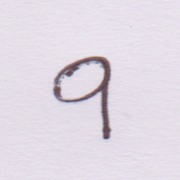

In [3]:
from PIL import Image
data_dir = 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/training-a'
name = os.listdir(data_dir)[10]
Image.open(data_dir+"/"+name)

### Showing Samples

In [4]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [5]:
a_csv = showRawTrainingSamples('training-a.csv')
c_csv = showRawTrainingSamples('training-c.csv')
d_csv = showRawTrainingSamples('training-d.csv')

training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-d.csv
Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')


In [6]:
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:5, :])   #First 5 Rows of the CSV File
  print("=============================")
  return csv_file

In [7]:
a_csv = dropColumns(a_csv)
c_csv = dropColumns(c_csv)
d_csv = dropColumns(d_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png      2
4      c00004.png      7
...           ...    ...
24293  c24293.png      3
24294  c24294.png      2
24295  c24295.png      7
24296  c24296.png      2
24297  c24297.png      7

[24298 rows x 2 columns]
     filename  digit
0  c00000.png      6
1  c00001.png      1
2  c00002.png      3
3  c00003.png      2
4  c00004.png      7
         filename  digit
0      d00000.png      1
1      d00001.png      1
2      d00002.png    

In [8]:
a_csv = pd.read_csv('C:/Users/Mayeesha/Desktop/sc/NumtaDB/training-a.csv')
a_csv.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [9]:
a_csv = a_csv.drop(columns=['original filename', 'scanid',
       'database name original', 'contributing team', 'database name'])
a_csv.iloc[:11, 0:]

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0
5,a00005.png,4
6,a00006.png,3
7,a00007.png,0
8,a00008.png,4
9,a00009.png,9


In [10]:
c_csv = pd.read_csv('C:/Users/Mayeesha/Desktop/sc/NumtaDB/training-c.csv')
c_csv.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [11]:
c_csv = c_csv.drop(columns=['original filename', 'scanid',
       'database name original', 'contributing team', 'database name'])
c_csv.iloc[:10, 0:]

,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7
5,c00005.png,3
6,c00006.png,4
7,c00007.png,7
8,c00008.png,5
9,c00009.png,3


In [12]:
d_csv = pd.read_csv('C:/Users/Mayeesha/Desktop/sc/NumtaDB/training-c.csv')
d_csv.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [13]:
d_csv = d_csv.drop(columns=['original filename', 'scanid',
       'database name original', 'contributing team', 'database name'])
d_csv.iloc[:10, 0:]

,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7
5,c00005.png,3
6,c00006.png,4
7,c00007.png,7
8,c00008.png,5
9,c00009.png,3


In [14]:
#Concating 3 csv
total_csv = [a_csv, c_csv, d_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

68298


In [15]:
TRAIN_PATH = 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/train'

In [ ]:
#making folder train
os.mkdir(TRAIN_PATH)

In [20]:
def processImages(folder_name):
    src = PATH + folder_name + '/'
    dir_folders = os.listdir(src)
    for dir_name in dir_folders:
        file_name = os.path.join(src, dir_name)
        if os.path.isfile(file_name):
            shutil.copy(file_name, TRAIN_PATH) 

In [21]:
#copying images of three folder to train folder
processImages('training-a')
print('A Done')
processImages('training-c')
print('C Done')
processImages('training-d')
print('D Done')

A Done
C Done
D Done


In [16]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [17]:
# Normalizing data
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))

Trainig Samples:  68298


## Designing Neural Network Models

# Combination-1:
iteration=5000, epoch=14, lr=0.001, batch size=200, optimizer=Adam, num_hidden = 100, Layer=2, activations=ReLU, Loss function=CrossEntropyLoss

In [18]:
# Hyperparameters

batch_size = 200
num_iters = 5000
num_hidden = 100
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [19]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

14


In [20]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:308
Test dataloader:35


In [21]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        ###self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        ###self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        ###out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        ###out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [22]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=100, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_out): Linear(in_features=100, out_features=10, bias=True)
)

In [23]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [24]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 2.002051591873169. Accuracy: 25.46492897935276
2
3
Iteration: 1000. Loss: 1.8084993362426758. Accuracy: 38.40972323912725
4
Iteration: 1500. Loss: 1.7670708894729614. Accuracy: 40.899106750622344
5
6
Iteration: 2000. Loss: 1.6696139574050903. Accuracy: 45.07248499048177
7
8
Iteration: 2500. Loss: 1.5830371379852295. Accuracy: 48.36725728510763
9
Iteration: 3000. Loss: 1.5428467988967896. Accuracy: 51.295943769219505
10
11
Iteration: 3500. Loss: 1.368764042854309. Accuracy: 52.97993849758383
12
Iteration: 4000. Loss: 1.3579825162887573. Accuracy: 54.356421145116414
13


In [25]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'E:/CSE/softConputing/NumtaDB/assignment2/model/combination1.pkl') 

# Combination-2:
iteration=5000, epoch=14, lr=0.001, batch size=200, optimizer=Adam, num_hidden = 100, Layer=3, activations=ReLU, Loss function=CrossEntropyLoss

In [27]:
# Hyperparameters

batch_size = 200
num_iters = 5000
num_hidden = 100
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [28]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

14


In [29]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:308
Test dataloader:35


In [31]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [32]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=100, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=100, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=100, out_features=10, bias=True)
)

In [33]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [34]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 2.07180118560791. Accuracy: 27.31000146434324
2
3
Iteration: 1000. Loss: 2.016425371170044. Accuracy: 29.49187289500659
4
Iteration: 1500. Loss: 1.741481900215149. Accuracy: 34.90994289061356
5
6
Iteration: 2000. Loss: 1.6602952480316162. Accuracy: 41.63127837165032
7
8
Iteration: 2500. Loss: 1.6188243627548218. Accuracy: 43.06633474886513
9
Iteration: 3000. Loss: 1.599918007850647. Accuracy: 42.75882266803339
10
11
Iteration: 3500. Loss: 1.5430854558944702. Accuracy: 44.12066188314541
12
Iteration: 4000. Loss: 1.5207512378692627. Accuracy: 44.677112315126664
13


In [35]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'E:/CSE/softConputing/NumtaDB/assignment2/model/combination2.pkl') 

# Combination-3:
iteration=5000, epoch=14, lr=0.001, batch size=200, optimizer=Adam, num_hidden = 150, Layer=3, activations=ReLU, Loss function=CrossEntropyLoss

In [36]:
# Hyperparameters

batch_size = 200
num_iters = 5000
num_hidden = 150
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [37]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

14


In [38]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:308
Test dataloader:35


In [40]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [41]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=150, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=150, out_features=150, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=150, out_features=150, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=150, out_features=10, bias=True)
)

In [42]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [43]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 1.9341932535171509. Accuracy: 25.596719871137793
2
3
Iteration: 1000. Loss: 1.7797245979309082. Accuracy: 34.92458632303412
4
Iteration: 1500. Loss: 1.6845479011535645. Accuracy: 44.01815785620149
5
6
Iteration: 2000. Loss: 1.4783931970596313. Accuracy: 47.18113925904232
7
8
Iteration: 2500. Loss: 1.5502046346664429. Accuracy: 50.988431688387756
9
Iteration: 3000. Loss: 1.3536765575408936. Accuracy: 51.67667301215405
10
11
Iteration: 3500. Loss: 1.3255234956741333. Accuracy: 56.77258749450871
12
Iteration: 4000. Loss: 1.248772144317627. Accuracy: 55.732903792649
13


In [44]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'E:/CSE/softConputing/NumtaDB/assignment2/model/combination3.pkl') 

# Combination-4:
iteration=5000, epoch=14, lr=0.001, batch size=200, optimizer=Adam, num_hidden = 200, Layer=3, activations=ReLU, Loss function=CrossEntropyLoss

In [45]:
# Hyperparameters

batch_size = 200
num_iters = 5000
num_hidden = 200
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [46]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

14


In [47]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:308
Test dataloader:35


In [49]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [50]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [51]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [52]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 1.8502153158187866. Accuracy: 27.83716503148338
2
3
Iteration: 1000. Loss: 1.7094354629516602. Accuracy: 34.03133694538
4
Iteration: 1500. Loss: 1.6925479173660278. Accuracy: 42.62703177624835
5
6
Iteration: 2000. Loss: 1.3626867532730103. Accuracy: 49.74373993264021
7
8
Iteration: 2500. Loss: 1.2556071281433105. Accuracy: 53.74139698345292
9
Iteration: 3000. Loss: 1.358113408088684. Accuracy: 55.45467857665837
10
11
Iteration: 3500. Loss: 1.0717111825942993. Accuracy: 60.14057695123737
12
Iteration: 4000. Loss: 0.9812244176864624. Accuracy: 60.726314248059744
13


In [53]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'E:/CSE/softConputing/NumtaDB/assignment2/model/combination4.pkl') 

# Combination-5:
iteration=5000, epoch=14, lr=0.001, batch size=200, optimizer=Adam, num_hidden = 200, Layer=3, activations=SELU, Loss function=CrossEntropyLoss

In [54]:
# Hyperparameters

batch_size = 200
num_iters = 5000
num_hidden = 200
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [55]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

14


In [56]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:308
Test dataloader:35


In [57]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.SELU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.SELU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.SELU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [58]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): SELU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): SELU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): SELU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [59]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [60]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 1.851885199546814. Accuracy: 39.99121394054767
2
3
Iteration: 1000. Loss: 1.7450916767120361. Accuracy: 44.618538585444426
4
Iteration: 1500. Loss: 1.1469746828079224. Accuracy: 55.00073217162103
5
6
Iteration: 2000. Loss: 1.0556366443634033. Accuracy: 60.82881827500366
7
8
Iteration: 2500. Loss: 1.0223535299301147. Accuracy: 67.75516180992825
9
Iteration: 3000. Loss: 0.876280665397644. Accuracy: 65.74901156831162
10
11
Iteration: 3500. Loss: 0.7865107655525208. Accuracy: 73.27573583247913
12
Iteration: 4000. Loss: 0.83172607421875. Accuracy: 74.95973056084347
13


In [61]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'E:/CSE/softConputing/NumtaDB/assignment2/model/combination5.pkl') 

# Combination-6:
iteration=5000, epoch=14, lr=0.001, batch size=200, optimizer=Adam, num_hidden = 200, Layer=3, activations=RReLU, Loss function=CrossEntropyLoss

In [70]:
# Hyperparameters

batch_size = 200
num_iters = 5000
num_hidden = 200
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [71]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

14


In [72]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:308
Test dataloader:35


In [73]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.RReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.RReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.RReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [74]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): RReLU(lower=0.125, upper=0.3333333333333333)
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): RReLU(lower=0.125, upper=0.3333333333333333)
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): RReLU(lower=0.125, upper=0.3333333333333333)
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [75]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [76]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 1.8899548053741455. Accuracy: 34.119197539903354
2
3
Iteration: 1000. Loss: 1.5722349882125854. Accuracy: 43.490994289061355
4
Iteration: 1500. Loss: 1.4353547096252441. Accuracy: 50.812710499341044
5
6
Iteration: 2000. Loss: 1.1632227897644043. Accuracy: 53.82925757797628
7
8
Iteration: 2500. Loss: 0.9357652068138123. Accuracy: 65.80758529799385
9
Iteration: 3000. Loss: 0.9531119465827942. Accuracy: 66.21760140576951
10
11
Iteration: 3500. Loss: 0.9818577766418457. Accuracy: 70.78635232098404
12
Iteration: 4000. Loss: 0.8183508515357971. Accuracy: 73.15858837311465
13


In [77]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'E:/CSE/softConputing/NumtaDB/assignment2/model/combination6.pkl') 

# Combination-7:
iteration=5000, epoch=14, lr=0.001, batch size=200, optimizer=Adam, num_hidden = 200, Layer=3, activations=Sigmoid, Loss function=CrossEntropyLoss

In [78]:
# Hyperparameters

batch_size = 200
num_iters = 5000
num_hidden = 200
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [79]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

14


In [80]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:308
Test dataloader:35


In [81]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.Sigmoid()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.Sigmoid()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.Sigmoid()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [82]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): Sigmoid()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): Sigmoid()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): Sigmoid()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [83]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [84]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 2.0954980850219727. Accuracy: 24.99633914189486
2
3
Iteration: 1000. Loss: 1.9632785320281982. Accuracy: 33.577390540342655
4
Iteration: 1500. Loss: 1.6662564277648926. Accuracy: 36.4475032947723
5
6
Iteration: 2000. Loss: 1.808862566947937. Accuracy: 38.49758383365061
7
8
Iteration: 2500. Loss: 1.5443555116653442. Accuracy: 42.94918728950066
9
Iteration: 3000. Loss: 1.5129013061523438. Accuracy: 46.156098989603166
10
11
Iteration: 3500. Loss: 1.5200963020324707. Accuracy: 46.6100453946405
12
Iteration: 4000. Loss: 1.384485125541687. Accuracy: 48.95299458193001
13


In [85]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'E:/CSE/softConputing/NumtaDB/assignment2/model/combination7.pkl') 

# Combination-8:
iteration=5000, epoch=14, lr=0.001, batch size=200, optimizer=Adam, num_hidden = 200, Layer=3, activations=GELU, Loss function=CrossEntropyLoss

In [86]:
# Hyperparameters

batch_size = 200
num_iters = 5000
num_hidden = 200
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [87]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

14


In [88]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:308
Test dataloader:35


In [89]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.GELU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.GELU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.GELU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [90]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): GELU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): GELU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): GELU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [91]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [92]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 1.933354139328003. Accuracy: 34.4267096207351
2
3
Iteration: 1000. Loss: 1.6043626070022583. Accuracy: 40.26943915653829
4
Iteration: 1500. Loss: 1.7052502632141113. Accuracy: 47.25435642114512
5
6
Iteration: 2000. Loss: 1.613397240638733. Accuracy: 45.58500512520135
7
8
Iteration: 2500. Loss: 1.2375528812408447. Accuracy: 54.81036755015376
9
Iteration: 3000. Loss: 1.2464101314544678. Accuracy: 57.85620149363011
10
11
Iteration: 3500. Loss: 1.1881598234176636. Accuracy: 54.66393322594816
12
Iteration: 4000. Loss: 0.8782936334609985. Accuracy: 64.29931175867624
13


In [93]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'E:/CSE/softConputing/NumtaDB/assignment2/model/combination8.pkl') 

# Combination-9:
iteration=5000, epoch=14, lr=0.001, batch size=200, optimizer=Adam, num_hidden = 200, Layer=4, activations=SELU, Loss function=CrossEntropyLoss

In [154]:
# Hyperparameters

batch_size = 200
num_iters = 5000
num_hidden = 200
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [155]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

14


In [156]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:308
Test dataloader:35


In [157]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.SELU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.SELU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.SELU()
        
        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.SELU()


        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
         ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [158]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): SELU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): SELU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): SELU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): SELU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [159]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [138]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 1.8995469808578491. Accuracy: 37.399326402108656
2
3
Iteration: 1000. Loss: 1.5171699523925781. Accuracy: 45.33606677405184
4
Iteration: 1500. Loss: 1.398962140083313. Accuracy: 56.0550593059013
5
6
Iteration: 2000. Loss: 1.1415431499481201. Accuracy: 63.46463611070435
7
8
Iteration: 2500. Loss: 1.0157082080841064. Accuracy: 66.77405183775078
9
Iteration: 3000. Loss: 0.8932211399078369. Accuracy: 72.4557036169278
10
11
Iteration: 3500. Loss: 0.6233296394348145. Accuracy: 72.95358031922683
12
Iteration: 4000. Loss: 0.7115881443023682. Accuracy: 80.07028847561868
13


In [139]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'E:/CSE/softConputing/NumtaDB/assignment2/model/combination9.pkl') 

# Combination-10:
iteration=5000, epoch=14, lr=0.001, batch size=200, optimizer=Adam, num_hidden = 250, Layer=4, activations=SELU, Loss function=CrossEntropyLoss

In [141]:
# Hyperparameters

batch_size = 200
num_iters = 5000
num_hidden = 250
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [142]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

14


In [143]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:308
Test dataloader:35


In [144]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.SELU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.SELU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.SELU()
        
        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.SELU()


        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
         ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [145]:
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=250, bias=True)
  (relu_1): SELU()
  (linear_2): Linear(in_features=250, out_features=250, bias=True)
  (relu_2): SELU()
  (linear_3): Linear(in_features=250, out_features=250, bias=True)
  (relu_3): SELU()
  (linear_4): Linear(in_features=250, out_features=250, bias=True)
  (relu_4): SELU()
  (linear_out): Linear(in_features=250, out_features=10, bias=True)
)

In [146]:
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [147]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 1.8908472061157227. Accuracy: 33.43095621613706
2
3
Iteration: 1000. Loss: 1.6988894939422607. Accuracy: 44.237809342509884
4
Iteration: 1500. Loss: 1.4279316663742065. Accuracy: 47.444721042612386
5
6
Iteration: 2000. Loss: 0.982621967792511. Accuracy: 56.37721481915361
7
8
Iteration: 2500. Loss: 1.0405484437942505. Accuracy: 66.80333870259189
9
Iteration: 3000. Loss: 0.6938892602920532. Accuracy: 71.18172499633914
10
11
Iteration: 3500. Loss: 0.6407827138900757. Accuracy: 74.03719431834823
12
Iteration: 4000. Loss: 0.6389110684394836. Accuracy: 76.14584858690877
13


In [148]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'E:/CSE/softConputing/NumtaDB/assignment2/model/combination10.pkl') 

# Testing Best Model
Best Model: Combination-9

In [160]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load('E:/CSE/softConputing/NumtaDB/assignment2/model/combination9.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


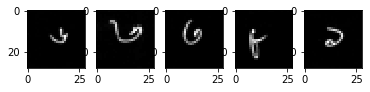

In [161]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [163]:
predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [6 3 3 2 1]


### Accuracies obtained for different Hyperparameters

- for all combinations iteration=5000, learning rate=0.001, Optimizer=Adam, batch size=200, epoch=14 and Loss function=CrossEntropyLoss    
Other hyperpatameters are shown in the table below along with Accuracy and Loss 

Combination|hidden layer| num_hidden | Activations  | Accuracy | Loss |
-----------|------------|------------|--------------|----------|------|
    1      |      2     |     100    |     ReLU     |54.356    |1.357 |
    2      |      3     |     100    |     ReLU     |44.677    |1.520 |
    3      |      3     |     150    |     ReLU     |55.732    |1.248 |
    4      |      3     |     200    |     ReLU     |60.726    |0.981 |
    5      |      3     |     200    |     SELU     |74.959    |0.831 |
    6      |      3     |     200    |     RReLU    |73.158    |0.818 |
    7      |      3     |     200    |    Sigmoid   |48.952    |1.384 |
    8      |      3     |     200    |     GELU     |64.299    |0.878 |
    9      |      4     |     200    |     SELU     |***80.070***    |0.711 |
    10     |      4     |     250    |     SELU     |76.145    |0.638 |
   

   

- **How hyperparameters were chosen**
    - Firstly, layer size 2 and 3 were take along with 3 different num_hidden 100, 150 and 200. It was seen that 3 layered model with 200 num_ hidden performed best.
    - Secondly, for the three layerd model and 200 num_hidden 4 diffenent activations SELU, RReLU, Sigmoid, GELU were tested. It could be seen that SELU performed better than others.
    - Thirdly, hidden layer size was increased from 3 to 4 for model with activation SELU and num_hidden 200 and it could be seen that this model gave highest accuracy.
    - Finally, for the model in combination 9 num_hidden were incresed to 250 but the accuracy of this model was less than that of model 9.

### *** Combination-9 performed the best ***
